In [2]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use("fivethirtyeight")# for pretty graphs



In [12]:
#importng the dataset
df = pd.read_csv("https://raw.githubusercontent.com/parulnith/Website-articles-datasets/master/The%20curious%20case%20of%20Simpson's%20Paradox/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
#Dropping few missing values. You can also impute them
df = df.dropna()

In [6]:
#Distribution of species in the dataset
df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

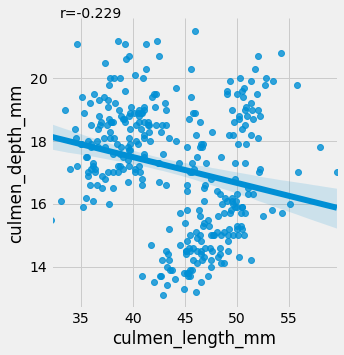

In [7]:
#Relationship between culmen length and culmen depth
sns.lmplot(x = 'culmen_length_mm',y = 'culmen_depth_mm', data = df);
r = stats.pearsonr(df['culmen_length_mm'], df['culmen_depth_mm'])[0]
ax = plt.gca()
ax.text(.03, 1, 'r={:.3f}'.format(r),
        transform=ax.transAxes)
plt.show()

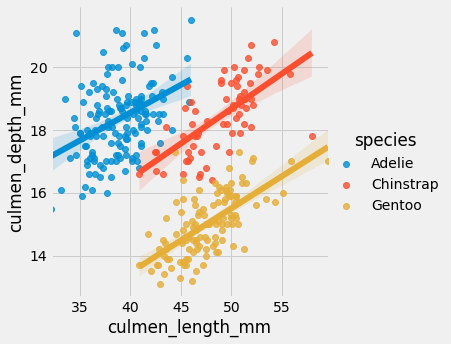

In [8]:
#Relationship between culmen length and culmen depth when group by species
sns.lmplot(x = 'culmen_length_mm',y = 'culmen_depth_mm', data = df, hue = 'species')

In [10]:
df_Adelie = df[df['species'] == 'Adelie']
df_Gentoo = df[df['species'] == 'Gentoo']
df_Chinstrap = df[df['species'] == 'Chinstrap']


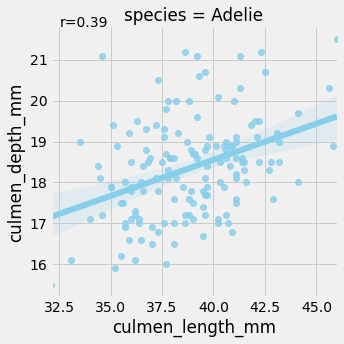

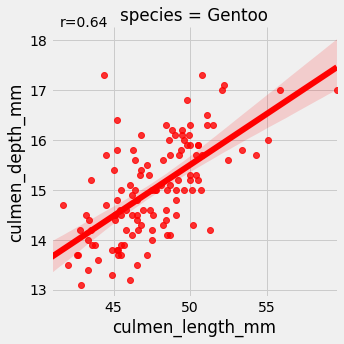

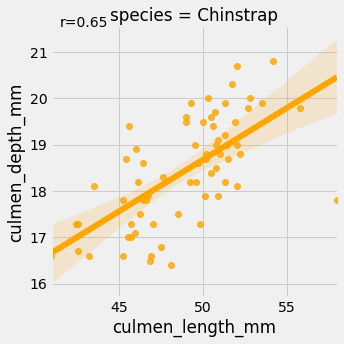

In [11]:
#Plotting the relationship between culmen length and depth for every species

datasets = [df_Adelie,df_Gentoo,df_Chinstrap]
color = ['skyblue','red','orange']
zip_datasets_color = zip(datasets, color)
for d,c in zip_datasets_color:
    g = sns.lmplot(x = 'culmen_length_mm',
                   y = 'culmen_depth_mm', 
                   data = d, 
                   row='species',
                   scatter_kws={'color': c},
                   line_kws={'color': c})
    r = stats.pearsonr(d['culmen_length_mm'], d['culmen_depth_mm'])[0]
    ax = plt.gca()
    ax.text(.03, 1, 'r={:.2f}'.format(r),
            transform=ax.transAxes)
 